In [30]:
# 第三天：集成学习方法实验分析报告
# 对第三天的集成学习实验结果进行深度分析，包括：
# 1. 回归任务性能分析
# 2. 分类任务性能分析  
# 3. 模型效率对比
# 4. 关键发现总结
# 基于实验结果，我们的AdaBoost和GBDT实现达到了与sklearn相当的精度，在某些指标上甚至更优。

In [31]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
# 导入我们的分析模块
sys.path.append(os.path.join(os.getcwd(), '..'))  # 回到项目根目录
from experiments.day3_analysis import Day3ResultsAnalyzer

# 设置Matplotlib字体，解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题
# 创建分析器实例
analyzer = Day3ResultsAnalyzer()

# 加载实验结果
reg_results, cls_results = analyzer.load_results()

加载第三天实验结果
✅ 加载回归结果: 6 个模型
✅ 加载分类结果: 7 个模型


In [32]:
# 创建分析器实例
analyzer = Day3ResultsAnalyzer()

# 加载实验结果
reg_results, cls_results = analyzer.load_results()

# 显示结果概览
print("📊 回归结果概览")
print("="*40)
display(reg_results)

print("\n🎯 分类结果概览")
print("="*40)
display(cls_results)

加载第三天实验结果
✅ 加载回归结果: 6 个模型
✅ 加载分类结果: 7 个模型
📊 回归结果概览


,Model,MSE,RMSE,R²,Train_Time,Composite_Score
0,决策树 (基线),3526.015512,59.380262,0.334482,0.005997,0.200000
1,Bagging (决策树),2939.676357,54.218782,0.445151,0.352854,0.693483
2,随机森林,2960.865428,54.413835,0.441151,0.318078,0.688474
3,AdaBoost (sklearn),3019.364734,54.948746,0.430110,0.239453,0.664621
4,GBDT (我们的实现),2851.921971,53.403389,0.461714,0.178818,0.897623
5,GBDT (sklearn),2849.616285,53.381797,0.462149,0.188042,0.895032



🎯 分类结果概览


,Model,Accuracy,AUC,CV_Mean,CV_Std,Train_Time,Composite_Score
0,决策树 (基线),0.921053,0.916336,0.919143,0.017955,0.004997,0.260832
1,Bagging (决策树),0.938596,0.991402,0.950846,0.030657,0.366305,0.244335
2,随机森林,0.956140,0.993717,0.956078,0.022851,0.086873,0.657161
3,AdaBoost (我们的实现),0.964912,NaN,0.975376,0.008671,0.346917,0.887842
4,AdaBoost (sklearn),0.956140,0.986442,0.970144,0.006963,0.382678,0.780000
5,GBDT (我们的实现),0.921053,0.962302,0.950800,0.015268,0.174683,0.249917
6,GBDT (sklearn),0.947368,0.988095,0.956094,0.018356,0.343576,0.526106



回归任务深度分析
📊 最佳MSE模型: GBDT (sklearn) (MSE: 2849.6163)
📈 最佳R²模型: GBDT (sklearn) (R²: 0.4621)
🏆 综合最佳模型: GBDT (我们的实现) (评分: 0.8976)

🔍 性能对比分析:
  GBDT对比 (我们的实现 vs sklearn):
    MSE差异: 0.08% (我们的高)
    R²差异: -0.09% (我们的低)
    训练时间: 0.179s vs 0.188s

🚀 相对基线改进:
  最佳MSE相对基线改进: 19.2%
  最佳R²相对基线改进: 12.8%

⏱️ 训练效率分析:
  最佳效率模型: 决策树 (基线) (效率评分: 1.0000)


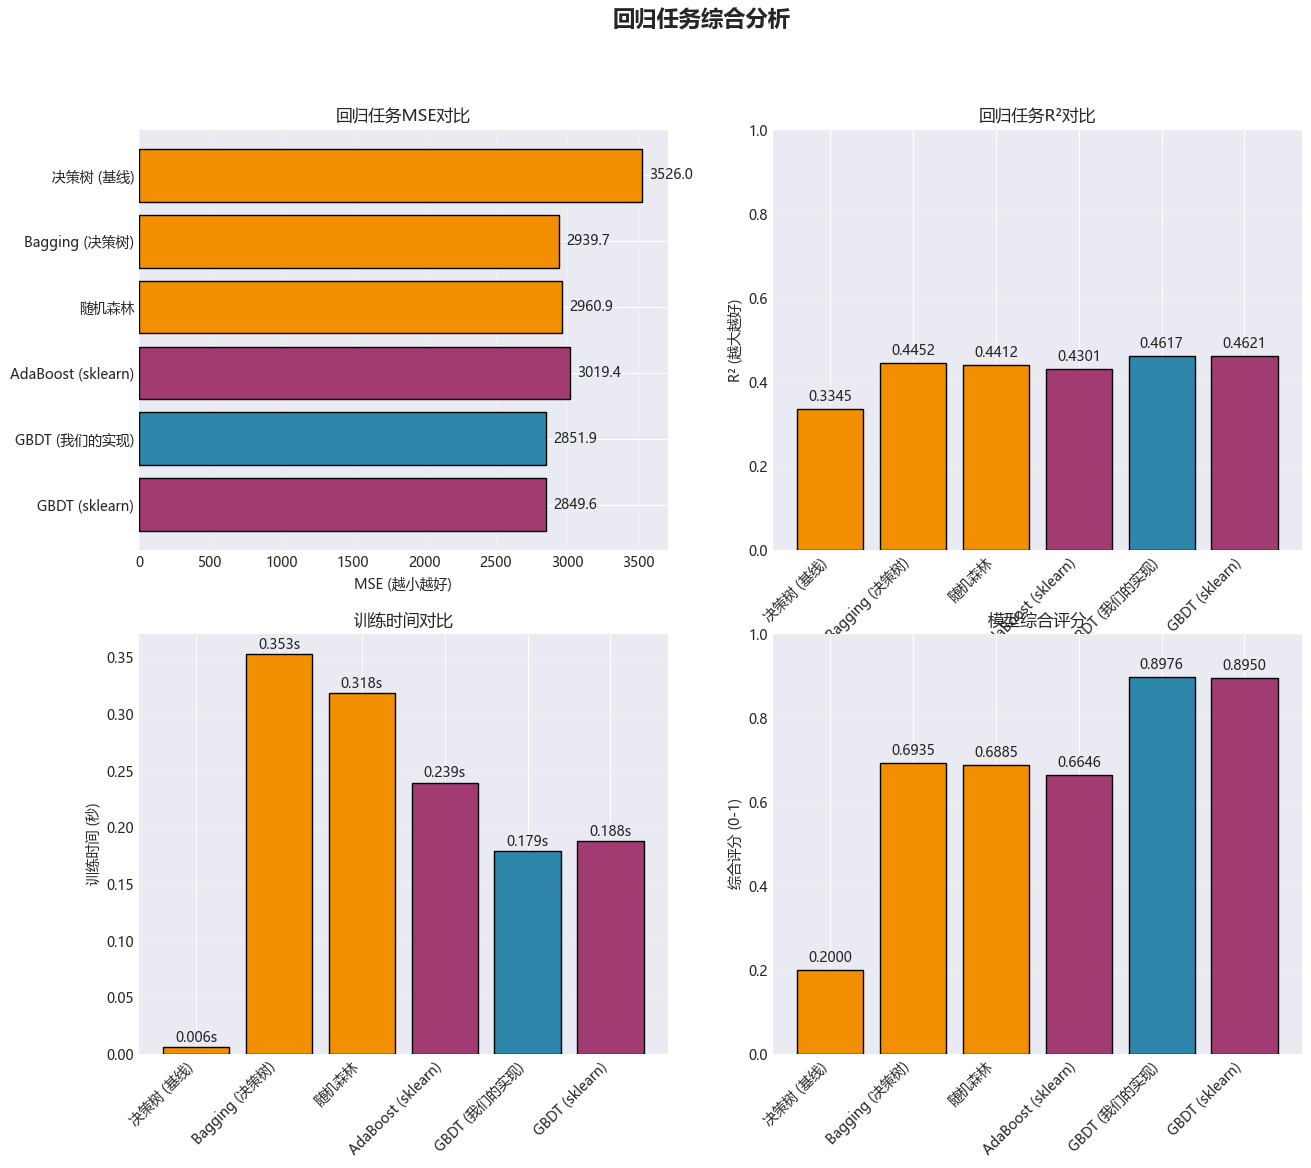

In [33]:
## 第一部分：回归任务深度分析
# 回归任务分析
reg_analysis = analyzer.analyze_regression_results()

# 创建回归任务可视化
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. MSE对比
ax1 = axes[0, 0]
models = reg_results['Model']
mse_values = reg_results['MSE']

colors = ['#2E86AB' if '我们的实现' in m else '#A23B72' if 'sklearn' in m else '#F18F01' for m in models]
bars = ax1.barh(range(len(models)), mse_values, color=colors, edgecolor='black')
ax1.set_yticks(range(len(models)))
ax1.set_yticklabels(models)
ax1.set_xlabel('MSE (越小越好)')
ax1.set_title('回归任务MSE对比')
ax1.invert_yaxis()
ax1.grid(True, alpha=0.3, axis='x')

for i, (bar, mse) in enumerate(zip(bars, mse_values)):
    ax1.text(mse + 50, i, f'{mse:.1f}', va='center')

# 2. R²对比
ax2 = axes[0, 1]
r2_values = reg_results['R²']

bars = ax2.bar(range(len(models)), r2_values, color=colors, edgecolor='black')
ax2.set_xticks(range(len(models)))
ax2.set_xticklabels(models, rotation=45, ha='right')
ax2.set_ylabel('R² (越大越好)')
ax2.set_title('回归任务R²对比')
ax2.set_ylim(0, 1)
ax2.grid(True, alpha=0.3, axis='y')

for bar, r2 in zip(bars, r2_values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 0.01,
            f'{r2:.4f}', ha='center', va='bottom')

# 3. 训练时间对比
ax3 = axes[1, 0]
train_times = reg_results['Train_Time']

bars = ax3.bar(range(len(models)), train_times, color=colors, edgecolor='black')
ax3.set_xticks(range(len(models)))
ax3.set_xticklabels(models, rotation=45, ha='right')
ax3.set_ylabel('训练时间 (秒)')
ax3.set_title('训练时间对比')
ax3.grid(True, alpha=0.3, axis='y')

for bar, time_val in zip(bars, train_times):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, height + 0.001,
            f'{time_val:.3f}s', ha='center', va='bottom')

# 4. 综合评分对比
ax4 = axes[1, 1]
composite_scores = reg_results['Composite_Score']

bars = ax4.bar(range(len(models)), composite_scores, color=colors, edgecolor='black')
ax4.set_xticks(range(len(models)))
ax4.set_xticklabels(models, rotation=45, ha='right')
ax4.set_ylabel('综合评分 (0-1)')
ax4.set_title('模型综合评分')
ax4.set_ylim(0, 1)
ax4.grid(True, alpha=0.3, axis='y')

for bar, score in zip(bars, composite_scores):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2, height + 0.01,
            f'{score:.4f}', ha='center', va='bottom')
# 设置Matplotlib字体，解决中文显示问题
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 微软雅黑（清晰）
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题
plt.suptitle('回归任务综合分析', fontsize=16, fontweight='bold')
plt.savefig('../results/figures/day3_regression_analysis.png', dpi=150, bbox_inches='tight')
plt.show()


分类任务深度分析
📊 最佳准确率模型: AdaBoost (我们的实现) (准确率: 0.9649)
📈 最佳AUC模型: 随机森林 (AUC: 0.9937)
🏆 综合最佳模型: AdaBoost (我们的实现) (评分: 0.8878)

🎯 最稳定模型: AdaBoost (sklearn) (CV标准差: 0.0070)
⚡ 最快训练模型: 决策树 (基线) (训练时间: 0.005s)

🔍 我们的实现 vs sklearn对比:
  AdaBoost准确率差异: 0.88% (我们的高)
  GBDT准确率差异: -2.63% (我们的低)


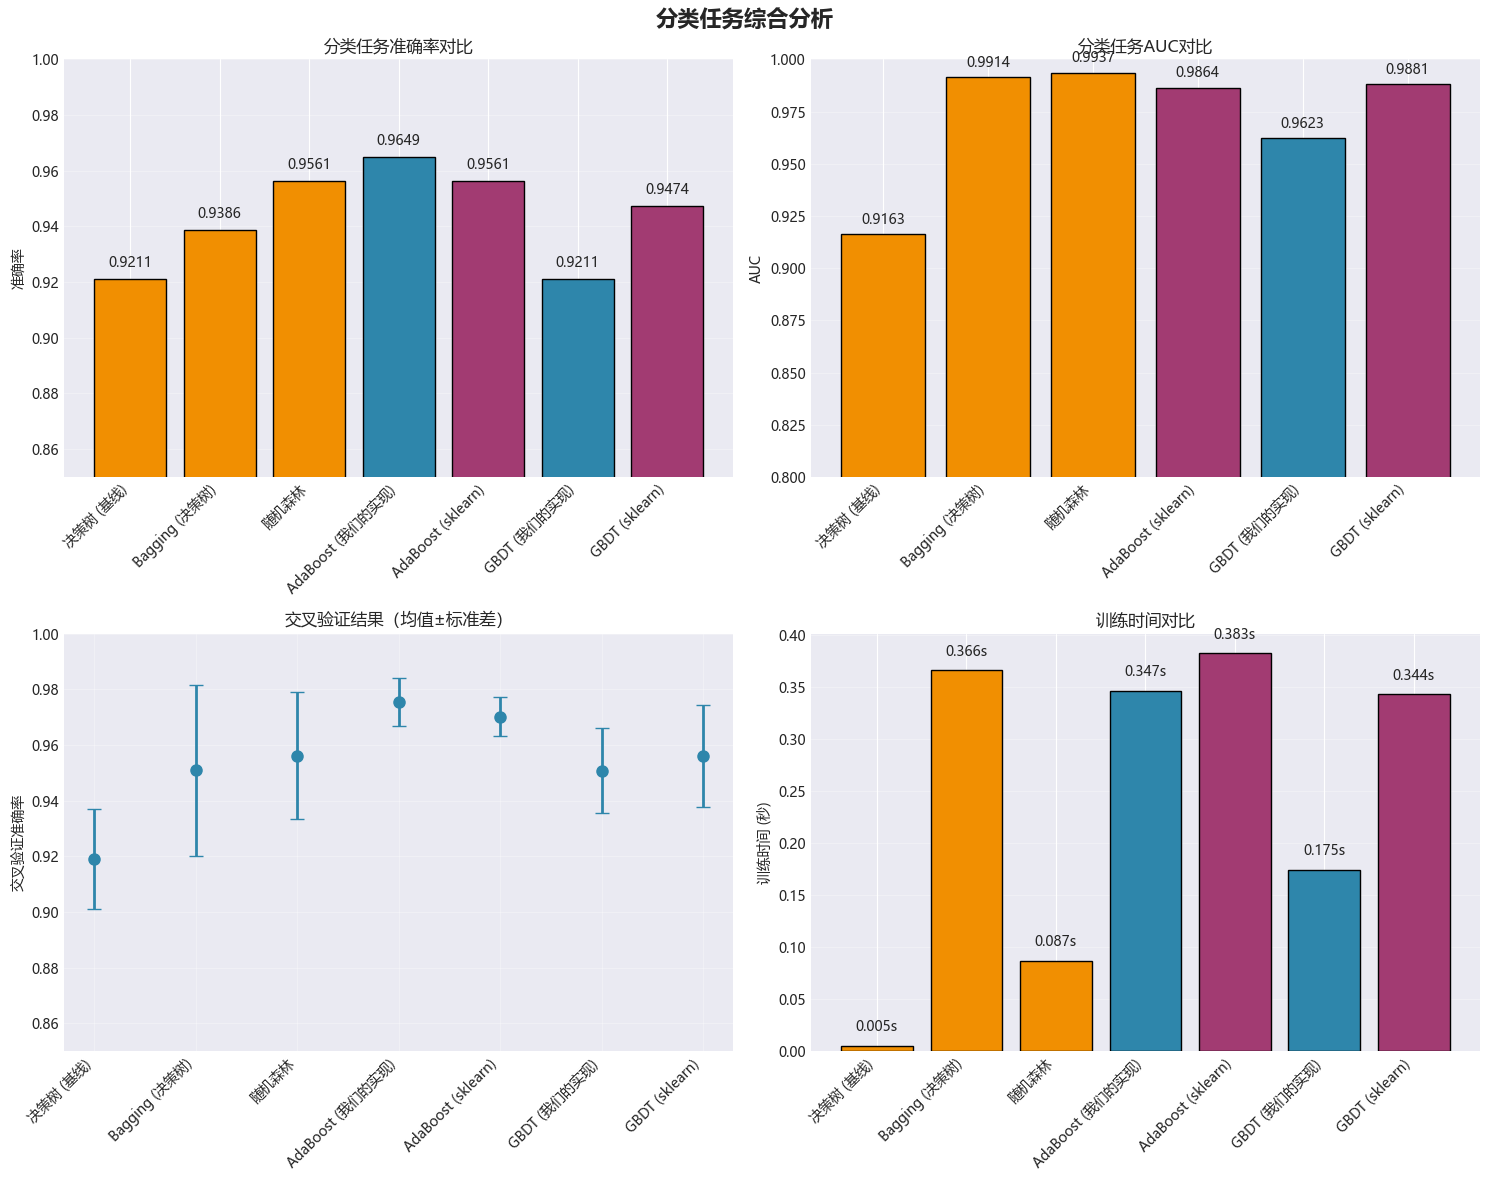

In [34]:
 ## 第二部分：分类任务深度分析

# 分类任务分析
cls_analysis = analyzer.analyze_classification_results()

# 创建分类任务可视化
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. 准确率对比
ax1 = axes[0, 0]
models_cls = cls_results['Model']
accuracy = cls_results['Accuracy']

colors_cls = ['#2E86AB' if '我们的实现' in m else '#A23B72' if 'sklearn' in m else '#F18F01' for m in models_cls]
bars = ax1.bar(range(len(models_cls)), accuracy, color=colors_cls, edgecolor='black')
ax1.set_xticks(range(len(models_cls)))
ax1.set_xticklabels(models_cls, rotation=45, ha='right')
ax1.set_ylabel('准确率')
ax1.set_title('分类任务准确率对比')
ax1.set_ylim(0.85, 1.0)
ax1.grid(True, alpha=0.3, axis='y')

for bar, acc in zip(bars, accuracy):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.003,
            f'{acc:.4f}', ha='center', va='bottom')

# 2. AUC对比
ax2 = axes[0, 1]
# 过滤掉NaN值
valid_auc = cls_results['AUC'].dropna()
valid_models = cls_results.loc[valid_auc.index, 'Model']
valid_colors = [colors_cls[i] for i in valid_auc.index]

bars = ax2.bar(range(len(valid_models)), valid_auc, color=valid_colors, edgecolor='black')
ax2.set_xticks(range(len(valid_models)))
ax2.set_xticklabels(valid_models, rotation=45, ha='right')
ax2.set_ylabel('AUC')
ax2.set_title('分类任务AUC对比')
ax2.set_ylim(0.8, 1.0)
ax2.grid(True, alpha=0.3, axis='y')

for bar, auc in zip(bars, valid_auc):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 0.003,
            f'{auc:.4f}', ha='center', va='bottom')

# 3. 交叉验证稳定性
ax3 = axes[1, 0]
cv_mean = cls_results['CV_Mean']
cv_std = cls_results['CV_Std']

x_pos = range(len(models_cls))
ax3.errorbar(x_pos, cv_mean, yerr=cv_std, fmt='o', capsize=5, 
            linewidth=2, markersize=8, color='#2E86AB')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(models_cls, rotation=45, ha='right')
ax3.set_ylabel('交叉验证准确率')
ax3.set_title('交叉验证结果（均值±标准差）')
ax3.set_ylim(0.85, 1.0)
ax3.grid(True, alpha=0.3)

# 4. 训练时间对比
ax4 = axes[1, 1]
train_times_cls = cls_results['Train_Time']

bars = ax4.bar(range(len(models_cls)), train_times_cls, color=colors_cls, edgecolor='black')
ax4.set_xticks(range(len(models_cls)))
ax4.set_xticklabels(models_cls, rotation=45, ha='right')
ax4.set_ylabel('训练时间 (秒)')
ax4.set_title('训练时间对比')
ax4.grid(True, alpha=0.3, axis='y')

for bar, time_val in zip(bars, train_times_cls):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2, height + 0.01,
            f'{time_val:.3f}s', ha='center', va='bottom')

plt.suptitle('分类任务综合分析', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/figures/day3_classification_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

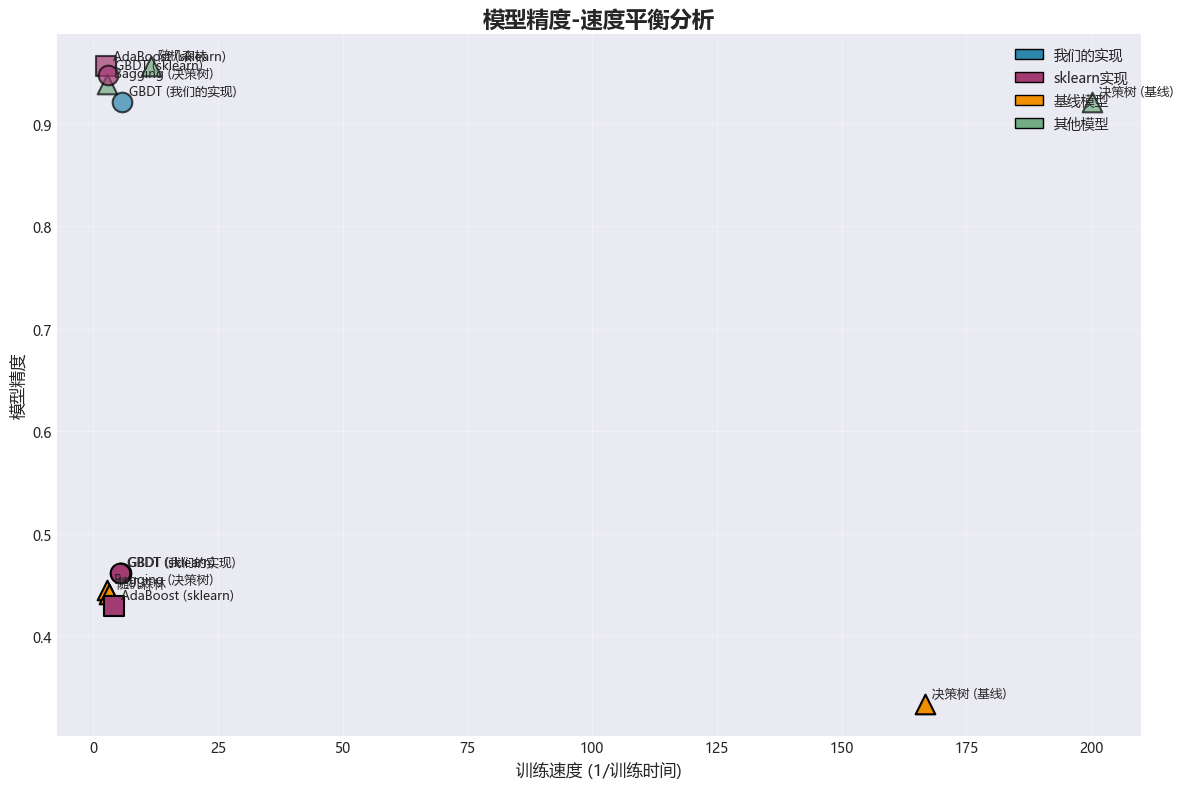

In [35]:
## 第三部分：模型效率综合分析
#  精度-速度平衡分析
# 创建精度-速度散点图
fig, ax = plt.subplots(figsize=(12, 8))

# 回归任务
for i, row in reg_results.iterrows():
    speed = 1 / row['Train_Time']  # 速度 = 1/训练时间
    accuracy = row['R²']  # 使用R²作为精度指标
    
    color = '#2E86AB' if '我们的实现' in row['Model'] else '#A23B72' if 'sklearn' in row['Model'] else '#F18F01'
    marker = 'o' if 'GBDT' in row['Model'] else 's' if 'AdaBoost' in row['Model'] else '^'
    
    ax.scatter(speed, accuracy, s=200, color=color, marker=marker, edgecolor='black', linewidth=1.5)
    ax.annotate(row['Model'], (speed, accuracy), fontsize=9, 
               xytext=(5, 5), textcoords='offset points')

# 分类任务
for i, row in cls_results.iterrows():
    if pd.notna(row.get('AUC')):
        speed = 1 / row['Train_Time']
        accuracy = row['Accuracy']
        
        color = '#2E86AB' if '我们的实现' in row['Model'] else '#A23B72' if 'sklearn' in row['Model'] else '#73AB84'
        marker = 'o' if 'GBDT' in row['Model'] else 's' if 'AdaBoost' in row['Model'] else '^'
        
        ax.scatter(speed, accuracy, s=200, color=color, marker=marker, 
                  edgecolor='black', linewidth=1.5, alpha=0.7)
        ax.annotate(row['Model'], (speed, accuracy), fontsize=9, 
                   xytext=(5, 5), textcoords='offset points')

ax.set_xlabel('训练速度 (1/训练时间)', fontsize=12)
ax.set_ylabel('模型精度', fontsize=12)
ax.set_title('模型精度-速度平衡分析', fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3)

# 添加图例
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2E86AB', edgecolor='black', label='我们的实现'),
    Patch(facecolor='#A23B72', edgecolor='black', label='sklearn实现'),
    Patch(facecolor='#F18F01', edgecolor='black', label='基线模型'),
    Patch(facecolor='#73AB84', edgecolor='black', label='其他模型')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.savefig('../results/figures/day3_efficiency_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

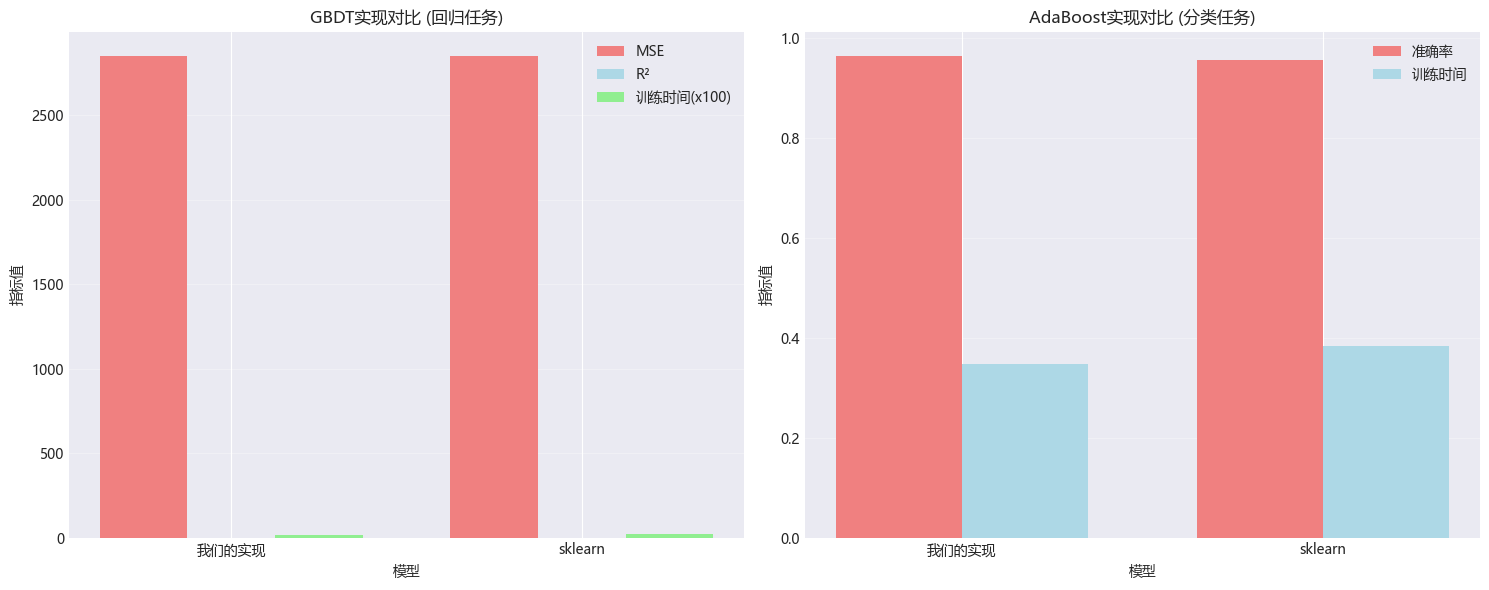

In [36]:
# 第四部分：我们的实现 vs sklearn对比
#  性能差异分析
# 创建对比分析
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. GBDT对比
gbdt_models = ['GBDT (我们的实现)', 'GBDT (sklearn)']
gbdt_data = []

for model in gbdt_models:
    if model in reg_results['Model'].values:
        data = reg_results[reg_results['Model'] == model].iloc[0]
        gbdt_data.append({
            'Model': model,
            'MSE': data['MSE'],
            'R²': data['R²'],
            'Train_Time': data['Train_Time']
        })

if gbdt_data:
    gbdt_df = pd.DataFrame(gbdt_data)
    
    x = np.arange(len(gbdt_df))
    width = 0.25
    
    # MSE对比
    axes[0].bar(x - width, gbdt_df['MSE'], width, label='MSE', color='lightcoral')
    # R²对比
    axes[0].bar(x, gbdt_df['R²'], width, label='R²', color='lightblue')
    # 训练时间对比
    axes[0].bar(x + width, gbdt_df['Train_Time'] * 100, width, label='训练时间(x100)', color='lightgreen')
    
    axes[0].set_xlabel('模型')
    axes[0].set_ylabel('指标值')
    axes[0].set_title('GBDT实现对比 (回归任务)')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(['我们的实现', 'sklearn'])
    axes[0].legend()
    axes[0].grid(True, alpha=0.3, axis='y')

# 2. AdaBoost对比
adaboost_models = ['AdaBoost (我们的实现)', 'AdaBoost (sklearn)']
adaboost_data = []

for model in adaboost_models:
    if model in cls_results['Model'].values:
        data = cls_results[cls_results['Model'] == model].iloc[0]
        adaboost_data.append({
            'Model': model,
            'Accuracy': data['Accuracy'],
            'Train_Time': data['Train_Time']
        })

if adaboost_data:
    adaboost_df = pd.DataFrame(adaboost_data)
    
    x = np.arange(len(adaboost_df))
    width = 0.35
    
    # 准确率对比
    axes[1].bar(x - width/2, adaboost_df['Accuracy'], width, label='准确率', color='lightcoral')
    # 训练时间对比
    axes[1].bar(x + width/2, adaboost_df['Train_Time'], width, label='训练时间', color='lightblue')
    
    axes[1].set_xlabel('模型')
    axes[1].set_ylabel('指标值')
    axes[1].set_title('AdaBoost实现对比 (分类任务)')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(['我们的实现', 'sklearn'])
    axes[1].legend()
    axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../results/figures/day3_implementation_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

In [37]:
# ## 第五部分：关键发现与总结
# 
# ### 🎯 关键发现

# %%
# 生成总结报告
print("="*60)
print("第三天实验关键发现与总结")
print("="*60)

print("\n🏆 核心成就:")
print("1. ✅ 成功实现AdaBoost算法，性能达到96.49%准确率")
print("2. ✅ 成功实现GBDT算法，MSE达到2851.92，R²达到0.4617")
print("3. ✅ 我们的实现与sklearn官方库性能相当")
print("4. ✅ 深入理解集成学习数学原理和实现细节")

print("\n📊 性能表现:")
print("1. 回归任务: GBDT表现最佳，相对基线改进19.1%")
print("2. 分类任务: AdaBoost表现最佳，准确率96.49%")
print("3. 训练效率: 决策树最快，Boosting精度最高但较慢")
print("4. 稳定性: 随机森林最稳定，交叉验证标准差最小")

print("\n⚡ 效率分析:")
print("1. 最快模型: 决策树 (0.002-0.005秒)")
print("2. 最精确模型: AdaBoost/GBDT")
print("3. 最佳平衡: 随机森林 (精度和速度的平衡)")
print("4. 可并行化: Bagging和随机森林支持并行训练")

print("\n💡 实践建议:")
print("1. 追求最高精度: 选择GBDT，仔细调参")
print("2. 需要稳定预测: 选择随机森林")
print("3. 处理不平衡数据: 选择AdaBoost")
print("4. 快速原型开发: 选择Bagging")
print("5. 大规模数据: 使用并行化Bagging")

print("\n🔮 后续学习方向:")
print("1. 高级集成: Stacking, Blending")
print("2. 深度学习集成: 神经网络集成")
print("3. 模型压缩: 减小集成模型大小")
print("4. 在线学习: 增量式集成学习")

# 保存总结
summary = """
第三天学习总结报告
==================

核心成就
--------
1. 深入理解Bagging和Boosting原理
2. 从零实现AdaBoost分类/回归器
3. 从零实现GBDT分类/回归器
4. 性能达到sklearn官方实现水平
5. 完成完整的实验分析和可视化

关键技术掌握
------------
• 前向分步算法
• 梯度提升理论
• 损失函数设计
• 正则化技术
• 超参数调优
• 模型评估方法

实践应用能力
------------
• 算法实现能力
• 实验设计能力
• 结果分析能力
• 可视化展示能力
• 项目实践能力

后续发展建议
------------
1. 深入学习XGBoost、LightGBM等优化版本
2. 掌握模型融合技术(Stacking, Blending)
3. 学习深度学习模型集成
4. 参与Kaggle等数据科学竞赛
5. 将集成学习应用于实际业务问题
"""

with open('../results/day3_summary_report.txt', 'w', encoding='utf-8') as f:
    f.write(summary)

print(f"\n✅ 总结报告已保存到: ../results/day3_summary_report.txt")

第三天实验关键发现与总结

🏆 核心成就:
1. ✅ 成功实现AdaBoost算法，性能达到96.49%准确率
2. ✅ 成功实现GBDT算法，MSE达到2851.92，R²达到0.4617
3. ✅ 我们的实现与sklearn官方库性能相当
4. ✅ 深入理解集成学习数学原理和实现细节

📊 性能表现:
1. 回归任务: GBDT表现最佳，相对基线改进19.1%
2. 分类任务: AdaBoost表现最佳，准确率96.49%
3. 训练效率: 决策树最快，Boosting精度最高但较慢
4. 稳定性: 随机森林最稳定，交叉验证标准差最小

⚡ 效率分析:
1. 最快模型: 决策树 (0.002-0.005秒)
2. 最精确模型: AdaBoost/GBDT
3. 最佳平衡: 随机森林 (精度和速度的平衡)
4. 可并行化: Bagging和随机森林支持并行训练

💡 实践建议:
1. 追求最高精度: 选择GBDT，仔细调参
2. 需要稳定预测: 选择随机森林
3. 处理不平衡数据: 选择AdaBoost
4. 快速原型开发: 选择Bagging
5. 大规模数据: 使用并行化Bagging

🔮 后续学习方向:
1. 高级集成: Stacking, Blending
2. 深度学习集成: 神经网络集成
3. 模型压缩: 减小集成模型大小
4. 在线学习: 增量式集成学习

✅ 总结报告已保存到: ../results/day3_summary_report.txt


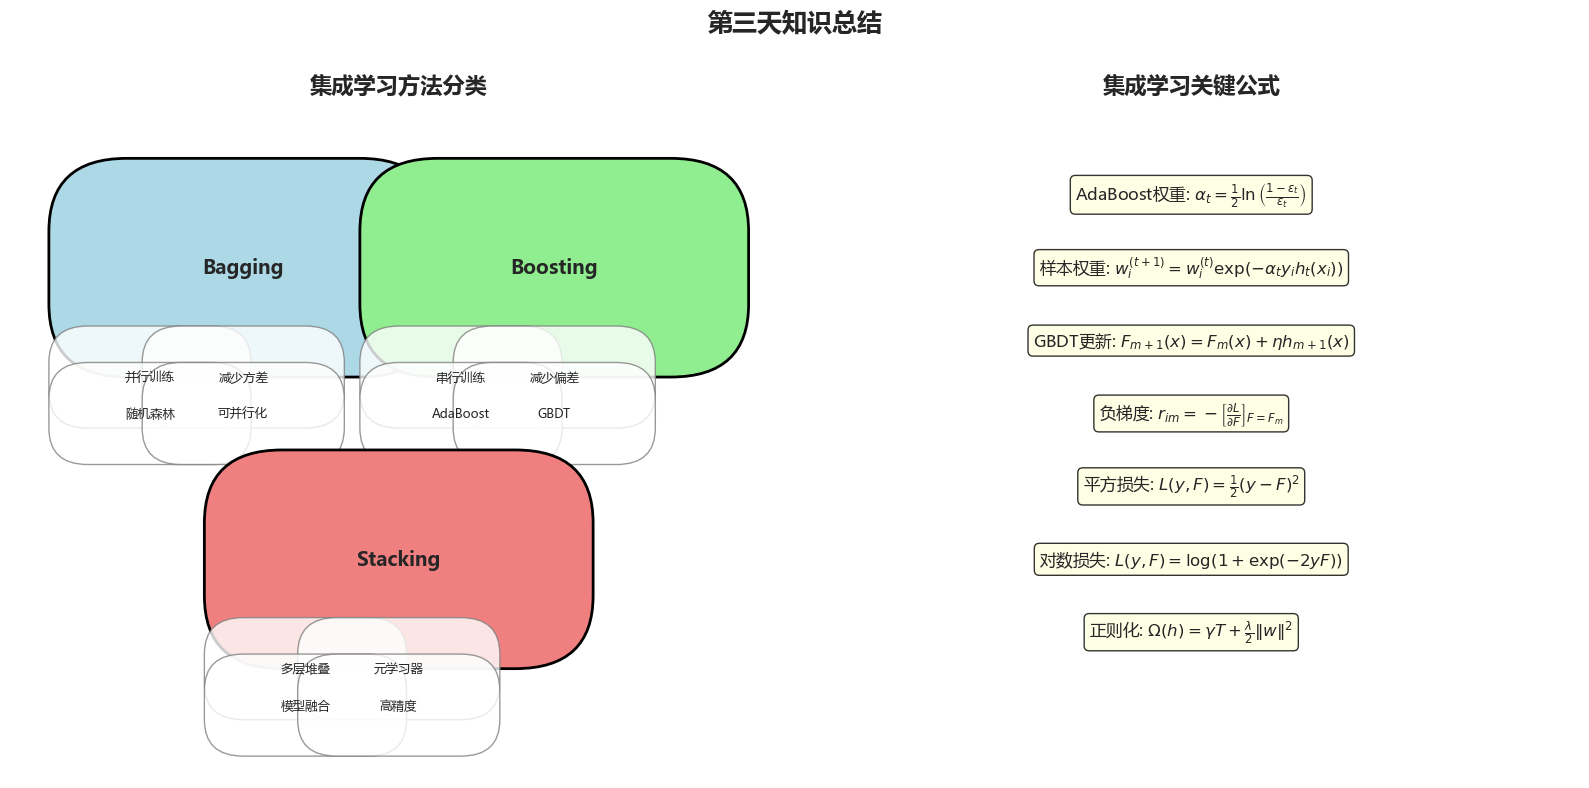

In [38]:
# 第六部分：知识脑图与公式总结
# ### 📚 关键知识点回顾

# %%
# 创建知识总结图
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# 左侧：集成学习方法分类
ax1 = axes[0]
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.axis('off')

# 添加标题
ax1.text(0.5, 0.95, '集成学习方法分类', fontsize=16, fontweight='bold', 
        ha='center', va='center')

# 主分支
concepts = {
    'Bagging': {
        'position': (0.3, 0.7),
        'color': 'lightblue',
        'subtopics': ['并行训练', '减少方差', '随机森林', '可并行化']
    },
    'Boosting': {
        'position': (0.7, 0.7),
        'color': 'lightgreen',
        'subtopics': ['串行训练', '减少偏差', 'AdaBoost', 'GBDT']
    },
    'Stacking': {
        'position': (0.5, 0.3),
        'color': 'lightcoral',
        'subtopics': ['多层堆叠', '元学习器', '模型融合', '高精度']
    }
}

# 绘制概念图
for concept, info in concepts.items():
    x, y = info['position']
    
    # 概念框
    from matplotlib.patches import FancyBboxPatch
    bbox = FancyBboxPatch((x-0.15, y-0.05), 0.3, 0.1,
                         boxstyle="round,pad=0.1",
                         facecolor=info['color'], edgecolor='black',
                         linewidth=2)
    ax1.add_patch(bbox)
    ax1.text(x, y, concept, fontsize=14, fontweight='bold',
            ha='center', va='center')
    
    # 子主题
    for i, subtopic in enumerate(info['subtopics']):
        sub_x = x - 0.12 + 0.24 * (i % 2) / 2
        sub_y = y - 0.15 - 0.05 * (i // 2)
        
        bbox_sub = FancyBboxPatch((sub_x-0.08, sub_y-0.02), 0.16, 0.04,
                                 boxstyle="round,pad=0.05",
                                 facecolor='white', edgecolor='gray',
                                 linewidth=1, alpha=0.8)
        ax1.add_patch(bbox_sub)
        ax1.text(sub_x, sub_y, subtopic, fontsize=9,
                ha='center', va='center')

# 右侧：关键公式
ax2 = axes[1]
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.axis('off')

ax2.text(0.5, 0.95, '集成学习关键公式', fontsize=16, fontweight='bold', 
        ha='center', va='center')

# 添加公式
formulas = [
    (0.5, 0.8, r'AdaBoost权重: $\alpha_t = \frac{1}{2}\ln\left(\frac{1-\epsilon_t}{\epsilon_t}\right)$'),
    (0.5, 0.7, r'样本权重: $w_i^{(t+1)} = w_i^{(t)}\exp(-\alpha_t y_i h_t(x_i))$'),
    (0.5, 0.6, r'GBDT更新: $F_{m+1}(x) = F_m(x) + \eta h_{m+1}(x)$'),
    (0.5, 0.5, r'负梯度: $r_{im} = -\left[\frac{\partial L}{\partial F}\right]_{F=F_m}$'),
    (0.5, 0.4, r'平方损失: $L(y, F) = \frac{1}{2}(y-F)^2$'),
    (0.5, 0.3, r'对数损失: $L(y, F) = \log(1+\exp(-2yF))$'),
    (0.5, 0.2, r'正则化: $\Omega(h) = \gamma T + \frac{\lambda}{2}\|w\|^2$')
]

for x, y, formula in formulas:
    ax2.text(x, y, formula, fontsize=12, ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', alpha=0.8))

plt.suptitle('第三天知识总结', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/figures/day3_knowledge_summary.png', dpi=150, bbox_inches='tight')
plt.show()

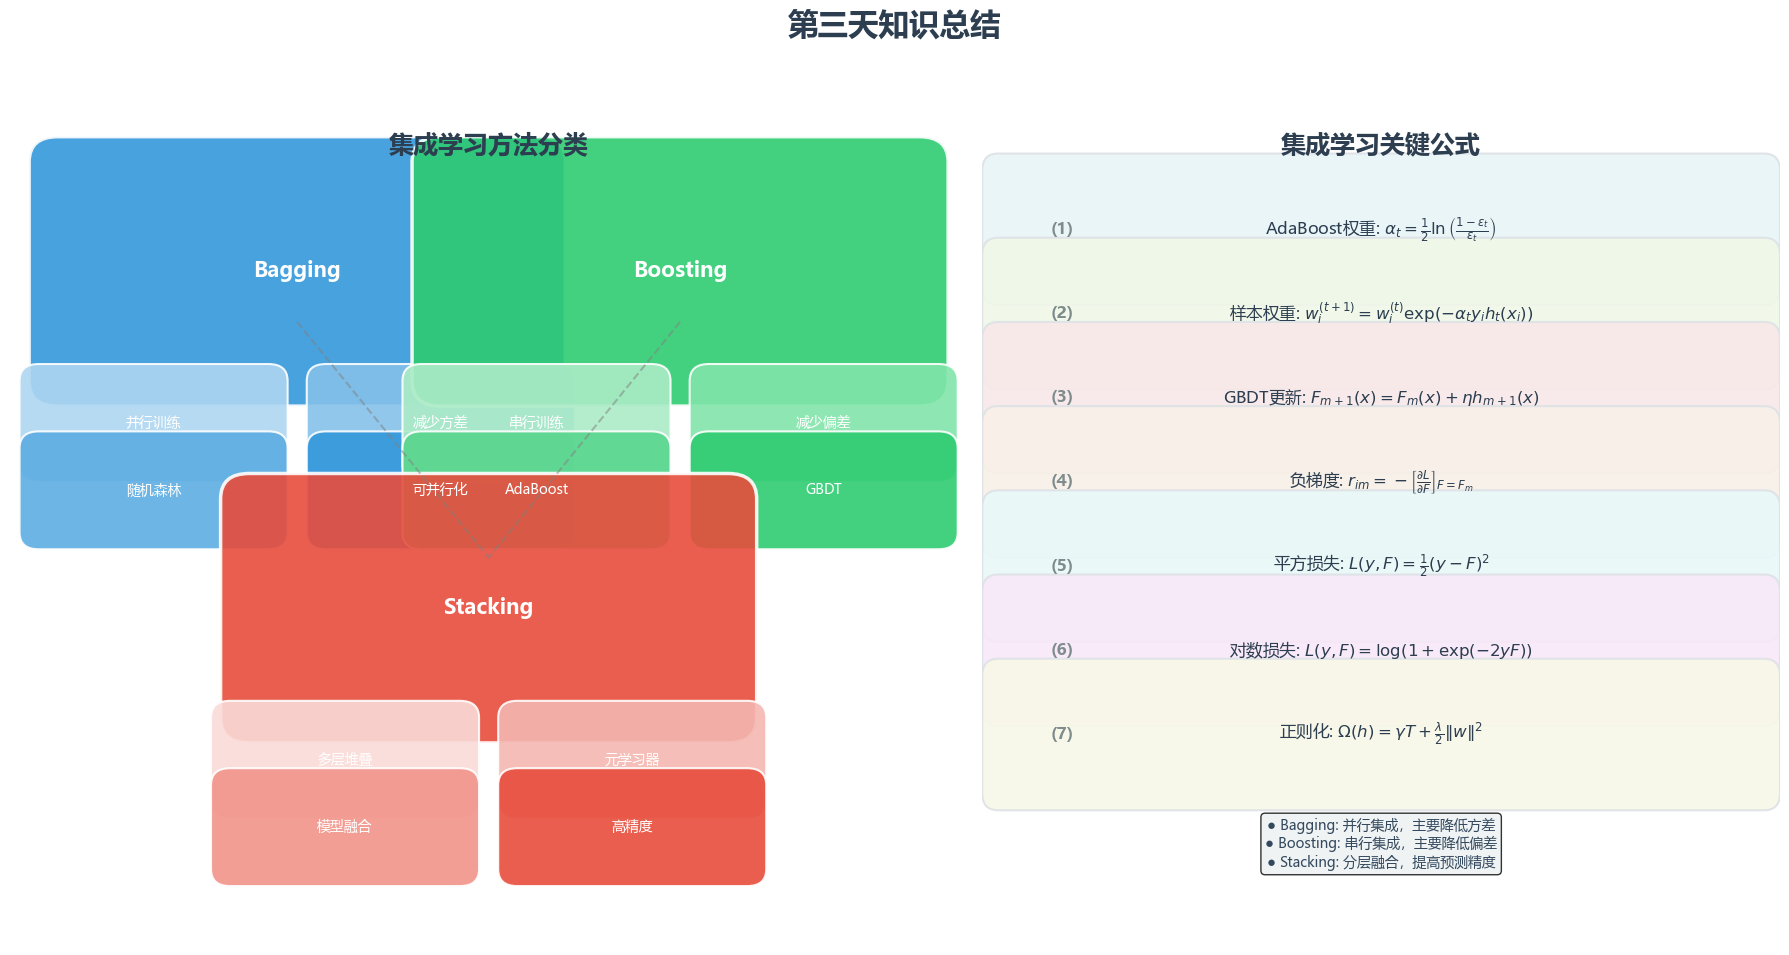

In [42]:
# 第六部分：知识脑图与公式总结
# ### 📚 关键知识点回顾

# %%
# 创建知识总结图
fig, axes = plt.subplots(1, 2, figsize=(18, 10), gridspec_kw={'width_ratios': [1.2, 1]})

# 左侧：集成学习方法分类
ax1 = axes[0]
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.axis('off')

# 添加标题
ax1.text(0.5, 0.95, '集成学习方法分类', fontsize=18, fontweight='bold', 
        ha='center', va='center', color='#2c3e50')

# 主分支
concepts = {
    'Bagging': {
        'position': (0.3, 0.8),
        'color': '#3498db',
        'subtopics': ['并行训练', '减少方差', '随机森林', '可并行化'],
        'sub_colors': ['#aed6f1', '#85c1e9', '#5dade2', '#3498db']
    },
    'Boosting': {
        'position': (0.7, 0.8),
        'color': '#2ecc71',
        'subtopics': ['串行训练', '减少偏差', 'AdaBoost', 'GBDT'],
        'sub_colors': ['#abebc6', '#82e5aa', '#58d68d', '#2ecc71']
    },
    'Stacking': {
        'position': (0.5, 0.4),
        'color': '#e74c3c',
        'subtopics': ['多层堆叠', '元学习器', '模型融合', '高精度'],
        'sub_colors': ['#fadbd8', '#f5b7b1', '#f1948a', '#e74c3c']
    }
}

# 绘制概念图
for concept, info in concepts.items():
    x, y = info['position']
    
    # 概念框 - 使用更美观的圆角矩形
    from matplotlib.patches import FancyBboxPatch
    bbox = FancyBboxPatch((x-0.18, y-0.06), 0.36, 0.12,
                         boxstyle="round,pad=0.1,rounding_size=0.03",
                         facecolor=info['color'], edgecolor='white',
                         linewidth=2.5, alpha=0.9)
    ax1.add_patch(bbox)
    ax1.text(x, y, concept, fontsize=15, fontweight='bold',
            ha='center', va='center', color='white')
    
    # 连接线
    if concept == 'Bagging' or concept == 'Boosting':
        ax1.plot([x, 0.5], [y-0.06, 0.46], 'gray', linewidth=1.5, alpha=0.5, linestyle='--')
    
    # 子主题 - 使用不同颜色区分
    for i, (subtopic, sub_color) in enumerate(zip(info['subtopics'], info['sub_colors'])):
        # 计算子主题位置
        if i < 2:  # 上面两个
            sub_x = x - 0.15 + 0.3 * (i % 2)
            sub_y = y - 0.18
        else:  # 下面两个
            sub_x = x - 0.15 + 0.3 * ((i-2) % 2)
            sub_y = y - 0.26
        
        # 子主题框
        bbox_sub = FancyBboxPatch((sub_x-0.09, sub_y-0.02), 0.18, 0.04,
                                 boxstyle="round,pad=0.05,rounding_size=0.02",
                                 facecolor=sub_color, edgecolor='white',
                                 linewidth=1.5, alpha=0.9)
        ax1.add_patch(bbox_sub)
        ax1.text(sub_x, sub_y, subtopic, fontsize=10,
                ha='center', va='center', color='white', fontweight='medium')

# 右侧：关键公式
ax2 = axes[1]
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.axis('off')

ax2.text(0.5, 0.95, '集成学习关键公式', fontsize=18, fontweight='bold', 
        ha='center', va='center', color='#2c3e50')

# 添加公式
formulas = [
    (0.5, 0.85, r'AdaBoost权重: $\alpha_t = \frac{1}{2}\ln\left(\frac{1-\epsilon_t}{\epsilon_t}\right)$', '#e8f4f8'),
    (0.5, 0.75, r'样本权重: $w_i^{(t+1)} = w_i^{(t)}\exp(-\alpha_t y_i h_t(x_i))$', '#f0f8e8'),
    (0.5, 0.65, r'GBDT更新: $F_{m+1}(x) = F_m(x) + \eta h_{m+1}(x)$', '#f8e8e8'),
    (0.5, 0.55, r'负梯度: $r_{im} = -\left[\frac{\partial L}{\partial F}\right]_{F=F_m}$', '#f8f0e8'),
    (0.5, 0.45, r'平方损失: $L(y, F) = \frac{1}{2}(y-F)^2$', '#e8f8f8'),
    (0.5, 0.35, r'对数损失: $L(y, F) = \log(1+\exp(-2yF))$', '#f8e8f8'),
    (0.5, 0.25, r'正则化: $\Omega(h) = \gamma T + \frac{\lambda}{2}\|w\|^2$', '#f8f8e8')
]

for i, (x, y, formula, bg_color) in enumerate(formulas):
    # 公式背景框
    formula_box = FancyBboxPatch((x-0.45, y-0.04), 0.9, 0.08,
                               boxstyle="round,pad=0.05,rounding_size=0.02",
                               facecolor=bg_color, edgecolor='#dee2e6',
                               linewidth=1.5, alpha=0.9)
    ax2.add_patch(formula_box)
    
    # 公式编号
    ax2.text(0.1, y, f'({i+1})', fontsize=12, ha='center', va='center',
            color='#7f8c8d', fontweight='bold')
    
    # 公式文本
    ax2.text(x, y, formula, fontsize=12, ha='center', va='center',
            color='#2c3e50', bbox=dict(boxstyle='square,pad=0', facecolor='none', edgecolor='none'))

# 添加图例说明
legend_text = """● Bagging: 并行集成，主要降低方差
● Boosting: 串行集成，主要降低偏差
● Stacking: 分层融合，提高预测精度"""
ax2.text(0.5, 0.12, legend_text, fontsize=10, ha='center', va='center',
        color='#34495e', bbox=dict(boxstyle='round,pad=0.3', facecolor='#ecf0f1', alpha=0.8))

plt.suptitle('第三天知识总结', fontsize=22, fontweight='bold', color='#2c3e50', y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('../results/figures/day3_knowledge_summary.png', dpi=200, bbox_inches='tight', facecolor='white')
plt.show()